In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv("E:\movie imdb\insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [6]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [7]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [9]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [10]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
z = LabelEncoder()

In [13]:
z

LabelEncoder()

In [14]:
df["sex"] = z.fit_transform(df["region"])

In [15]:
df["smoker"] = z.fit_transform(df["region"])

In [16]:
df["region"] = z.fit_transform(df["region"])

In [17]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,3,27.900,0,3,3,16884.92400
1,18,2,33.770,1,2,2,1725.55230
2,28,2,33.000,3,2,2,4449.46200
3,33,1,22.705,0,1,1,21984.47061
4,32,1,28.880,0,1,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,2,36.850,0,2,2,1629.83350
1336,21,3,25.800,0,3,3,2007.94500


In [18]:
x=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 10)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=10)

The Accuracy for Test Set is 32.58706467661692


Text(0.5, -7.277777777777782, 'Predicted Values')

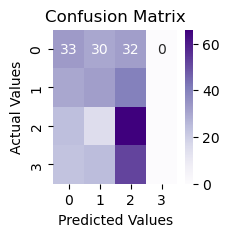

In [21]:
y_pred = classifier.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))
#Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (2,2))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Purples')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.35      0.32        95
           1       0.31      0.31      0.31       102
           2       0.35      0.63      0.45       105
           3       0.00      0.00      0.00       100

    accuracy                           0.33       402
   macro avg       0.24      0.32      0.27       402
weighted avg       0.24      0.33      0.27       402



c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(x_train)
X_test_sc = sc.transform(x_test)

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=10)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=10)